# Neural Networks & Naïve Bayes

In [1]:
import pandas as pd

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
df_train = pd.read_csv('train_insurance_one_hot.csv')
df_test = pd.read_csv('test_insurance_one_hot.csv')
X_train_all_feat = df_train.drop(columns=['chargeGroup','charges', 'id'], axis=1)
X_test_all_feat = df_test.drop(columns=['chargeGroup','charges', 'id'], axis=1)
y_train = df_train['chargeGroup']
y_test = df_test['chargeGroup']

In [3]:
(df_train['chargeGroup']=='medium').sum()

509

In [4]:
df_train['chargeGroup'].mode()

0    medium
Name: chargeGroup, dtype: object

In [5]:
random_seed = 42
def show_errors(errors):
    import matplotlib.pyplot as plt
    y_axis = errors
    x_axis = range(len(y_axis))
    plt.ticklabel_format(useOffset=False)
    plt.plot(x_axis, y_axis)
    plt.xlabel('Number of iterations')
    plt.ylabel('Error')
    plt.title('Evolution of Error')
    plt.show()
    
def train_and_report(model, *,
                     X_train: pd.DataFrame = X_train_all_feat, 
                     X_test: pd.DataFrame = X_test_all_feat):
    # Fit, predict
    #print(X_train.columns.tolist())
    model.fit(X_train, y_train)
    try:
        print(list(model.named_steps["preprocess"].get_feature_names_out()))
        print(model.named_steps["preprocess"].fit_transform(X_train)[:5])
    except Exception:
        pass
        
    y_predicted = model.predict(X_test)
    
    # Report
    print(f"Accuracy: {100*accuracy_score(y_test,y_predicted):.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_predicted)}")
    try:
        print(f"\nNum_iter/Total: {model.n_iter_}/{model.max_iter}")
        print(f"\nLast 10 loss:\n {model.loss_curve_[-10:]}")
        show_errors(model.loss_curve_)
    except AttributeError:
        try:
            print(f"\nNum_iter/Total: {model[-1].n_iter_}/{model['mlp'].max_iter}")
            print(f"\nLast 10 loss:\n {model[-1].loss_curve_[-10:]}")
            show_errors(model[-1].loss_curve_)
        except Exception:
            pass
    print(f"\nProb of first 5 predicted:\n {model.predict_proba(X_test)[:5]}")

In [6]:
X_train_all_feat

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,23.845,0,False,True,True,False,True,False,False,False
1,60,36.005,0,True,False,True,False,True,False,False,False
2,34,31.920,1,True,False,False,True,True,False,False,False
3,19,28.600,5,True,False,True,False,False,False,False,True
4,19,20.425,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1065,57,25.740,2,True,False,True,False,False,False,True,False
1066,23,33.400,0,True,False,True,False,False,False,False,True
1067,52,44.700,3,True,False,True,False,False,False,False,True
1068,18,31.920,0,True,False,True,False,True,False,False,False


## a) Baseline MLP

Accuracy: 93.66%
Confusion Matrix:
[[ 32   0   1]
 [  0 131   0]
 [  4  12  88]]

Num_iter/Total: 1783/2000

Last 10 loss:
 [0.20006381784617983, 0.20102249303002795, 0.2003589195808974, 0.20275251993038398, 0.20009499211627063, 0.20033740228166555, 0.20013882727805266, 0.2005384654708291, 0.20261866109725754, 0.20009353904685567]


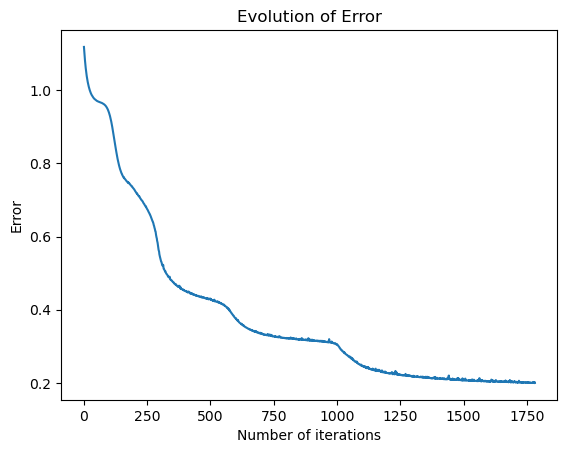


Prob of first 5 predicted:
 [[2.61172900e-04 9.24470010e-01 7.52688166e-02]
 [2.61621333e-04 9.24358492e-01 7.53798868e-02]
 [2.64116497e-04 9.23738055e-01 7.59978285e-02]
 [2.96893918e-04 9.15611996e-01 8.40911098e-02]
 [1.46897692e-02 1.28309218e-04 9.85181922e-01]]


In [7]:
# Create the classifier with required config: 
classifier = MLPClassifier(hidden_layer_sizes=tuple((5,))*5, 
                           activation='logistic', 
                           max_iter=2000, 
                           random_state=random_seed,
                           n_iter_no_change=50,
                          )
train_and_report(classifier)

## b)

['cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest', 'cat__region_southeast', 'cat__region_southwest', 'num__age', 'num__bmi', 'num__children']
[[ 1.     0.     0.     0.     0.    23.    23.845  0.   ]
 [ 0.     0.     0.     0.     0.    60.    36.005  0.   ]
 [ 0.     1.     0.     0.     0.    34.    31.92   1.   ]
 [ 0.     0.     0.     0.     1.    19.    28.6    5.   ]
 [ 1.     0.     1.     0.     0.    19.    20.425  0.   ]]
Accuracy: 94.03%
Confusion Matrix:
[[ 32   0   1]
 [  0 131   0]
 [  3  12  89]]

Num_iter/Total: 1362/2000

Last 10 loss:
 [0.20653057661382054, 0.20646262014044384, 0.20648296302602323, 0.2063918667044663, 0.20633710728184046, 0.2063175911105633, 0.20629244112418876, 0.2062468407395724, 0.20618069538275066, 0.20622104749824488]


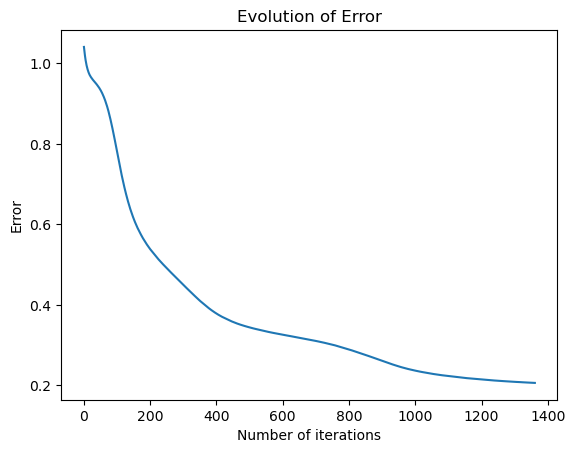


Prob of first 5 predicted:
 [[2.64077383e-04 9.21118490e-01 7.86174323e-02]
 [2.88754567e-04 9.29917932e-01 6.97933130e-02]
 [2.78993302e-04 9.29742173e-01 6.99788333e-02]
 [3.53046054e-04 9.10705417e-01 8.89415372e-02]
 [2.33790169e-03 3.45095550e-05 9.97627589e-01]]


In [8]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_train_orig = pd.read_csv('train_insurance.csv')
df_test_orig = pd.read_csv('test_insurance.csv')
X_train_all_feat_orig = df_train_orig.drop(columns=['chargeGroup','charges', 'id'], axis=1) #
X_test_all_feat_orig = df_test_orig.drop(columns=['chargeGroup','charges', 'id'], axis=1)
# Target feature is the same anyway, so use previous Ys

binary_cat_cols = ["sex", "smoker"]
multi_cat_cols  = ["region"]
numeric_cols    = ["age", "bmi", "children"]

# Option 1: Use ordinal for multi-catogorical feature
# preprocess = ColumnTransformer(
#     transformers=[
#         ("bin_cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"),
#          binary_cat_cols),

#         ("multi_cat", OrdinalEncoder(
#             handle_unknown="use_encoded_value", unknown_value=-1),
#          multi_cat_cols),

#         ("num", StandardScaler(), numeric_cols),
#     ]
# )

# Option 2: Use one-hot encoder for all catogorical feature
categorical_cols = ["sex", "smoker", "region"]
numeric_cols = ["age", "bmi", "children"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("scaler", StandardScaler()), 
        ("mlp", MLPClassifier(hidden_layer_sizes=tuple((5,))*2, 
                                activation='logistic', max_iter=2000, n_iter_no_change=50,
                                random_state=random_seed)),
    ]
)
train_and_report(clf, X_train=X_train_all_feat_orig, X_test=X_test_all_feat_orig)


## c)

In [9]:
from sklearn.naive_bayes import GaussianNB
clf_wo_std = GaussianNB()
clf_w_std = Pipeline([
    ("scaler", StandardScaler()),   # scales ALL numeric/boolean columns
    ("gNB", GaussianNB())
])
print(f"GaussianNB without standadization:")
train_and_report(clf_wo_std)
print(f"\n\nGaussianNB with standadization:")
train_and_report(clf_w_std)

GaussianNB without standadization:
Accuracy: 61.57%
Confusion Matrix:
[[ 33   0   0]
 [  0 131   0]
 [ 21  82   1]]

Prob of first 5 predicted:
 [[1.23866154e-17 9.99999938e-01 6.21058022e-08]
 [2.14579939e-16 9.99999964e-01 3.63154869e-08]
 [2.57772746e-17 9.99999762e-01 2.38003056e-07]
 [2.65365877e-17 9.99999318e-01 6.81773220e-07]
 [4.91737190e-15 9.99751629e-01 2.48370640e-04]]


GaussianNB with standadization:
Accuracy: 61.57%
Confusion Matrix:
[[ 33   0   0]
 [  0 131   0]
 [ 21  82   1]]

Prob of first 5 predicted:
 [[1.00895405e-20 1.00000000e+00 5.05941776e-11]
 [1.74786640e-19 1.00000000e+00 2.95842060e-11]
 [2.09969112e-20 1.00000000e+00 1.93888073e-10]
 [2.16154033e-20 9.99999999e-01 5.55403557e-10]
 [4.00644842e-18 9.99999798e-01 2.02384038e-07]]
